In [21]:
import typing 

import pandas
import seaborn
from matplotlib import pyplot

import cltrier_lib

import twon_agents

In [16]:
SEED: int = 1
DATA_PATH: str = "../../../data"

METRICS: typing.List[str] = [
    "public_metrics.impression_count",
    "public_metrics.like_count",
    "public_metrics.retweet_count",
    "public_metrics.reply_count",
]

In [10]:
congress_meta: pandas.DataFrame = pandas.read_csv(
    f"{DATA_PATH}/raw/twitter.english/congress_meta.csv"
).pipe(
    lambda _df: _df.assign(
        username=_df["link"].str.extract(r"https://x.com/(\w+)"),
        first_name=_df["name"].str.extract(r"\w+, (.+)"),
        last_name=_df["name"].str.extract(r"(.+), \w+"),
        party=_df["party"].map(dict(D="Democratic Party", R="Republican Party")),
    )
)
[["username", "first_name", "last_name", "party"]]
congress_meta.head()

,name,link,state,party,username,first_name,last_name
0,"Baldwin, Tammy",https://x.com/SenatorBaldwin,WI,Democratic Party,SenatorBaldwin,Tammy,Baldwin
1,"Barrasso, John",https://x.com/SenJohnBarrasso,WY,Republican Party,SenJohnBarrasso,John,Barrasso
2,"Bennet, Michael F.",https://x.com/SenatorBennet,CO,Democratic Party,SenatorBennet,Michael F.,Bennet
3,"Blackburn, Marsha",https://x.com/MarshaBlackburn,TN,Republican Party,MarshaBlackburn,Marsha,Blackburn
4,"Blumenthal, Richard",https://x.com/SenBlumenthal,CT,Democratic Party,SenBlumenthal,Richard,Blumenthal


In [19]:
posts: pandas.DataFrame = twon_agents.data.filter_tweets(
    pandas.read_csv(f"{DATA_PATH}/raw/twitter.english/USCongressTweets_2023.csv")
    .rename(
        columns={
            "tweet_id": "id",
            "full_text": "text",
            "screen_name": "username",
            "original_user_id": "author_id",
        }
    )
    .merge(right=congress_meta, left_on="username", right_on="username")
    .pipe(
        lambda _df: _df.assign(
            id=_df["id"].astype("Int64"), author_id=_df["author_id"].astype("Int64"),
            created_at=pandas.to_datetime(_df["created_at"])
        )
    )
)
posts

,text,id,created_at,username,author_id,retweeted_user_ID,collected_at,reply_to_id,reply_to_user,expandedURL,name,link,state,party,first_name,last_name
12,Mifepristone for medication abortion is still ...,1692273284526555392,2023-08-17 20:32:46+00:00,SenMarkey,21406834,NaN,2023-08-26 08:20:57.781407,NaN,NaN,[],"Markey, Edward",https://x.com/SenMarkey,MA,Democratic Party,Edward,Markey
15,YouTube and Google can't keep treating young p...,1692224923949805824,2023-08-17 17:20:36+00:00,SenMarkey,21406834,NaN,2023-08-26 08:20:57.781427,1.692225e+18,21406834.0,[],"Markey, Edward",https://x.com/SenMarkey,MA,Democratic Party,Edward,Markey
17,Thank you to the movement that got us here. An...,1691854007113842688,2023-08-16 16:46:43+00:00,SenMarkey,21406834,NaN,2023-08-26 08:20:57.781441,1.691854e+18,21406834.0,[],"Markey, Edward",https://x.com/SenMarkey,MA,Democratic Party,Edward,Markey
18,Even as we face record-breaking heat and extre...,1691854006153347072,2023-08-16 16:46:42+00:00,SenMarkey,21406834,NaN,2023-08-26 08:20:57.781449,1.691854e+18,21406834.0,[],"Markey, Edward",https://x.com/SenMarkey,MA,Democratic Party,Edward,Markey
19,"And every day since, the IRA has turned words ...",1691854005176074496,2023-08-16 16:46:42+00:00,SenMarkey,21406834,NaN,2023-08-26 08:20:57.781455,1.691854e+18,21406834.0,[],"Markey, Edward",https://x.com/SenMarkey,MA,Democratic Party,Edward,Markey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91766,Instead of acknowledging its failing energy po...,1506739661519081472,2022-03-23 21:08:23+00:00,SenHydeSmith,983348251972816768,NaN,2023-08-26 08:59:31.732243,NaN,NaN,[],"Hyde-Smith, Cindy",https://x.com/SenHydeSmith,MS,Republican Party,Cindy,Hyde-Smith
91767,"Whether it’s farming, research, agricultural e...",1506722331510591488,2022-03-23 19:59:32+00:00,SenHydeSmith,983348251972816768,NaN,2023-08-26 08:59:31.732247,NaN,NaN,[],"Hyde-Smith, Cindy",https://x.com/SenHydeSmith,MS,Republican Party,Cindy,Hyde-Smith
91768,We need a strong response to the heavy-handed ...,1506682090124947712,2022-03-23 17:19:37+00:00,SenHydeSmith,983348251972816768,NaN,2023-08-26 08:59:31.732250,NaN,NaN,[],"Hyde-Smith, Cindy",https://x.com/SenHydeSmith,MS,Republican Party,Cindy,Hyde-Smith
91773,New York’s lack of religious exemption in its ...,1505981160790315008,2022-03-21 18:54:23+00:00,SenHydeSmith,983348251972816768,NaN,2023-08-26 08:59:31.732268,NaN,NaN,[],"Hyde-Smith, Cindy",https://x.com/SenHydeSmith,MS,Republican Party,Cindy,Hyde-Smith


In [10]:
(
    posts[
        [
            "id",
            "author_id",
            "first_name",
            "last_name",
            "username",
            "party",
            "created_at",
            "text",
        ]
    ].to_csv(f"{DATA_PATH}/interim/twitter.english.posts.csv")
)

<Axes: xlabel='week', ylabel='count'>

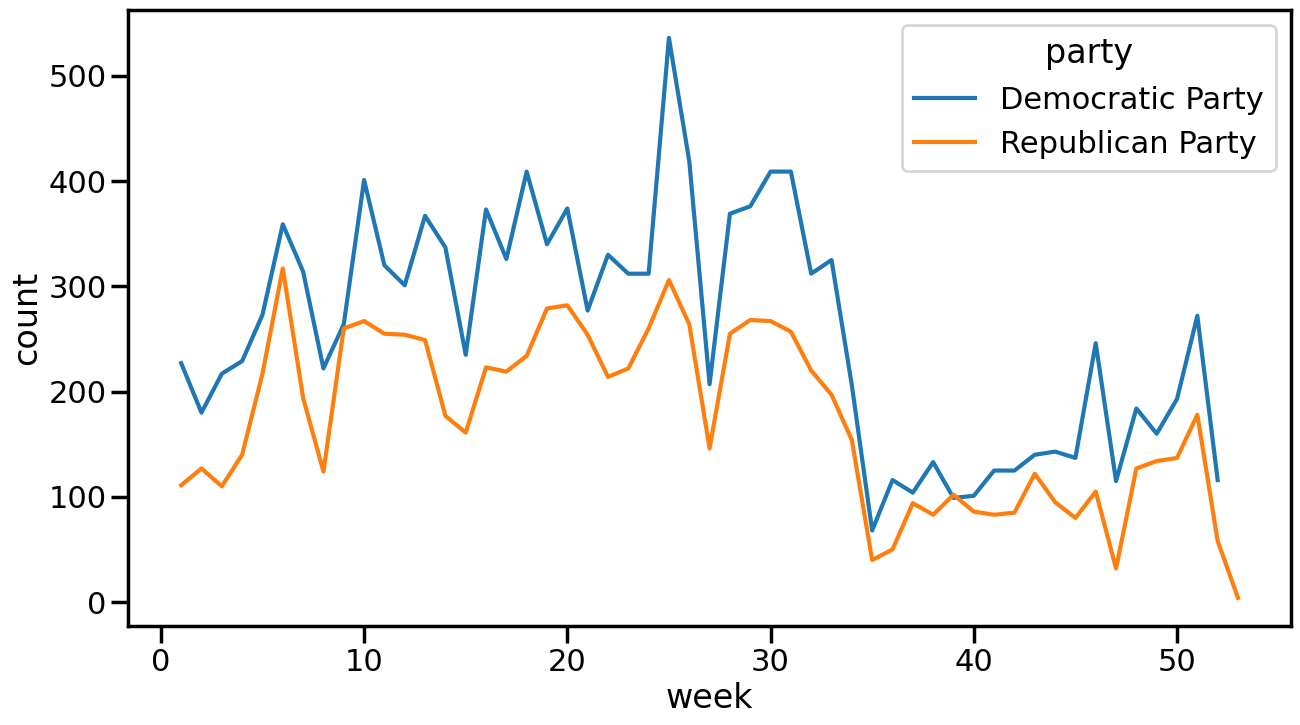

In [13]:
pyplot.figure(figsize=(15, 8))
seaborn.set_context("poster")

seaborn.lineplot(
    data=(
        posts.assign(week=posts["created_at"].dt.isocalendar().week)[["party", "week"]]
        .value_counts()
        .to_frame()
        .reset_index()
    ),
    x="week",
    y="count",
    hue="party",
)